# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [3]:
#URL for Weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response=requests.get(query_url+"new york").json()
print(response)

{'coord': {'lon': -74.01, 'lat': 40.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.72, 'feels_like': 78.28, 'temp_min': 72, 'temp_max': 80.01, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1596605613, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1596621422, 'sunset': 1596672415}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
data=[]
i=0
for city in cities:
#    print(city)

    json = requests.get(query_url + city).json()
    i=i+1
    
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([date,city,country,lat,lon,tempmax,humidity,cloudiness,speed])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")

counter 1 || yellowknife
counter 2 || avarua
counter 3 || aklavik
counter 4 || te anau
counter 5 || vaini
counter 6 || busselton
counter 7 || rikitea
counter 8 || upernavik
counter 9 || ushuaia
city not found
counter 11 || marquette
counter 12 || hermanus
counter 13 || san quintin
counter 14 || bluff
counter 15 || cherskiy
counter 16 || gigmoto
counter 17 || hamilton
counter 18 || katherine
counter 19 || chuy
counter 20 || touros
counter 21 || olafsvik
counter 22 || kapaa
city not found
counter 24 || pochutla
counter 25 || ribeira grande
counter 26 || albany
counter 27 || tiksi
counter 28 || punta arenas
counter 29 || lompoc
counter 30 || mataura
counter 31 || klaksvik
counter 32 || matagami
counter 33 || lavrentiya
counter 34 || dikson
counter 35 || rio grande
counter 36 || clyde river
counter 37 || bredasdorp
counter 38 || lagoa
counter 39 || iqaluit
counter 40 || arraial do cabo
counter 41 || hilo
counter 42 || hithadhoo
counter 43 || barrow
counter 44 || karagay
counter 45 || souil

counter 354 || itarantim
counter 355 || hambantota
counter 356 || del rio
counter 357 || jalu
counter 358 || ixtapa
counter 359 || portland
counter 360 || sinnamary
counter 361 || talnakh
city not found
counter 363 || sao joao da barra
city not found
counter 365 || kristiinankaupunki
counter 366 || nishihara
counter 367 || emerald
counter 368 || chippewa falls
counter 369 || wainwright
counter 370 || yazman
counter 371 || muros
city not found
city not found
counter 374 || namibe
counter 375 || taltal
counter 376 || salme
counter 377 || damietta
counter 378 || port lincoln
counter 379 || olga
counter 380 || kismayo
counter 381 || isla vista
counter 382 || storforshei
counter 383 || snezhnogorsk
counter 384 || shingu
counter 385 || mahajanga
counter 386 || ambunti
counter 387 || pimentel
counter 388 || conde
counter 389 || hovd
counter 390 || boende
counter 391 || tutoia
counter 392 || slave lake
counter 393 || beian
city not found
counter 395 || byron bay
counter 396 || kozhevnikovo
cou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_data_df=pd.DataFrame(data,columns=["Date","City","Country",
                                   "Latitude","Longitude",
                                   "Max Temperature (F)","Humidity (%)",
                                   "Cloudiness (%)","Wind Speed (mph)"])
raw_data_df.head()

,Date,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1596605710,yellowknife,CA,62.46,-114.35,59.00,93,75,8.05
1,1596605936,avarua,CK,-21.21,-159.78,75.20,94,98,11.41
2,1596605937,aklavik,CA,68.22,-135.01,53.60,81,90,6.93
3,1596605937,te anau,NZ,-45.42,167.72,47.01,87,42,0.58
4,1596605937,vaini,TO,-21.20,-175.20,73.40,73,20,4.70


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = raw_data_df[(raw_data_df["Humidity (%)"] > 100)].index
dirty_city_data

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,Date,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1596605710,yellowknife,CA,62.46,-114.35,59.00,93,75,8.05
1,1596605936,avarua,CK,-21.21,-159.78,75.20,94,98,11.41
2,1596605937,aklavik,CA,68.22,-135.01,53.60,81,90,6.93
3,1596605937,te anau,NZ,-45.42,167.72,47.01,87,42,0.58
4,1596605937,vaini,TO,-21.20,-175.20,73.40,73,20,4.70


In [8]:
# Extract relevant fields from the data frame
lat = clean_city_data["Latitude"]
tempmax = clean_city_data["Max Temperature (F)"]
humidity = clean_city_data["Humidity (%)"]
cloudiness = clean_city_data["Cloudiness (%)"]
wind_speed = clean_city_data["Wind Speed (mph)"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file,index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

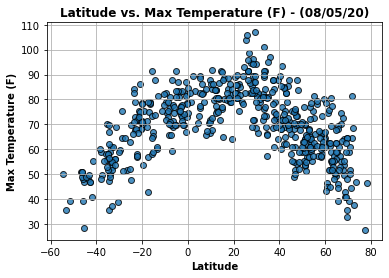

In [9]:
plt.scatter(lat, 
            tempmax,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("Latitude vs. Max Temperature (F) - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Max Temperature (F)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)

# Save the plotted figure as .png
plt.savefig('output_data/Latitude vs. Max Temperature Plot.png')

## Latitude vs. Humidity Plot

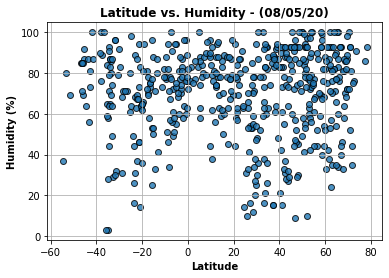

In [10]:
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("Latitude vs. Humidity - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Humidity (%)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)

# Save the plotted figure as .png
plt.savefig('output_data/Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

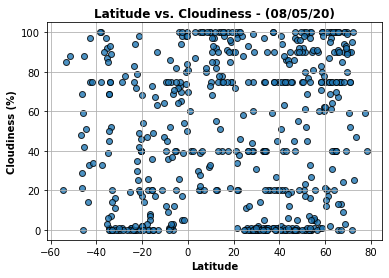

In [11]:
plt.scatter(lat, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("Latitude vs. Cloudiness - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Cloudiness (%)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)

# Save the plotted figure as .png
plt.savefig('output_data/Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

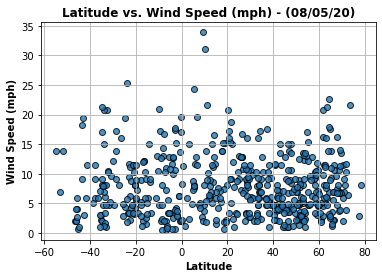

In [12]:
plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("Latitude vs. Wind Speed (mph) - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Wind Speed (mph)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)


# Save the plotted figure as .png
plt.savefig('output_data/Latitude vs. Wind Speed Plot.png')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames

In [15]:
northern_hemisphere=raw_data_df.loc[(raw_data_df["Latitude"]>=0)]
southern_hemisphere=raw_data_df.loc[(raw_data_df["Latitude"]<0)]

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.grid(True)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude', fontweight='bold')
    plt.ylabel(title, fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46550933176812975


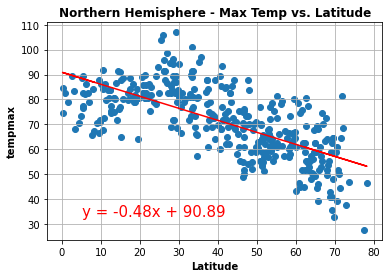

In [17]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Max Temperature (F)"]

plot_linear_regression(x_values,y_values,"tempmax",(5,33))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5950899934897713


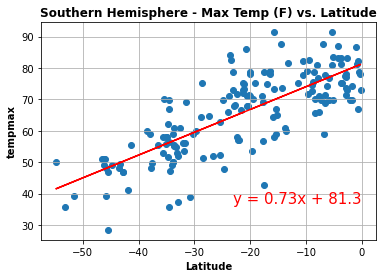

In [18]:
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Max Temperature (F)"]

plot_linear_regression(x_values,y_values,"tempmax",(-23,37))

In [19]:
# NH vs SH Max Temp: Explain what the linear regression is modeling, comment on any relationships you notice, 
# and include any other analysis you may have.

# Northern Hemisphere Max Temp r-squared correlation or coefficient of determination: 46.6% 
# Southern Hemisphere Max Temp r-squared correlation or coefficient of determination: 59.5%

#Therefore the Southern Hemisphere regression is better than the Northern Hemisphere regression at predicting Max Temp.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006821836151575975


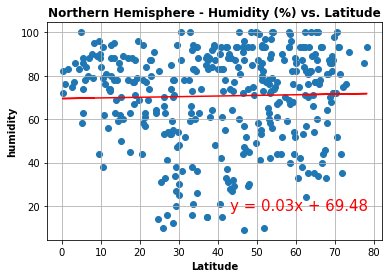

In [20]:
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Humidity (%)"]

plot_linear_regression(x_values,y_values,"humidity",(43,18))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000104117424897911


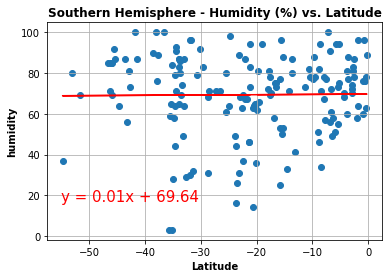

In [21]:
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Humidity (%)"]

plot_linear_regression(x_values,y_values,"humidity",(-55,17))

In [22]:
# NH vs SH Humidity: Explain what the linear regression is modeling, comment on any relationships you notice, 
# and include any other analysis you may have.

# Northern Hemisphere Humidity r-squared correlation coefficient of determination: 0.07% 
# Southern Hemisphere Humidity r-squared correlation coefficient of determination: 0.01%

#Therefore the Northern Hemisphere regression is better than the Southern Hemisphere regression at predicting Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.479093516114082e-05


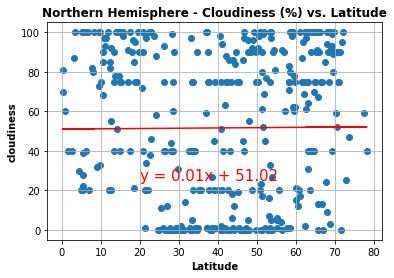

In [23]:
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Cloudiness (%)"]

plot_linear_regression(x_values,y_values,"cloudiness",(20,25))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001791961340184417


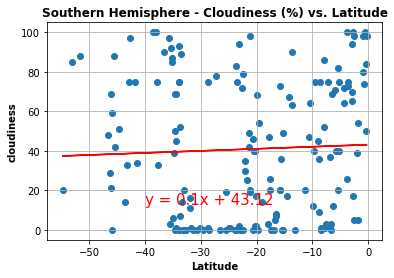

In [24]:
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Cloudiness (%)"]

plot_linear_regression(x_values,y_values,"cloudiness",(-40,13))

In [25]:
# NH vs SH Cloudiness: Explain what the linear regression is modeling, comment on any relationships you notice, 
# and include any other analysis you may have.

# Northern Hemisphere Cloudiness r-squared correlation coefficient of determination: 547.9% 
# Southern Hemisphere Cloudiness r-squared correlation coefficient of determination: 0.18%

#Therefore the Northern Hemisphere regression is better than the Southern Hemisphere regression at predicting Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007603854068522969


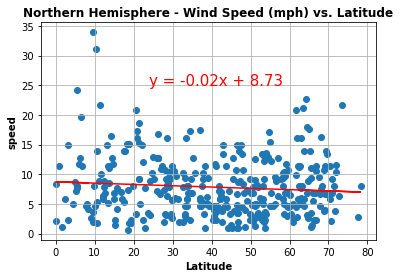

In [26]:
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Wind Speed (mph)"]

plot_linear_regression(x_values,y_values,"speed",(24,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0004346226975939931


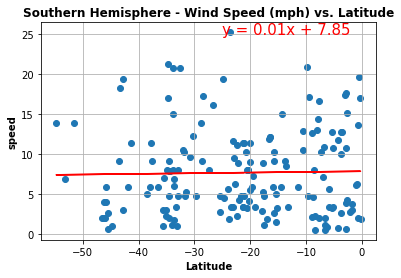

In [27]:
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Wind Speed (mph)"]

plot_linear_regression(x_values,y_values,"speed",(-25,25))

In [28]:
# NH vs SH Wind Speed: Explain what the linear regression is modeling, comment on any relationships you notice, 
# and include any other analysis you may have.

# Northern Hemisphere Cloudiness r-squared correlation coefficient of determination: 0.76% 
# Southern Hemisphere Cloudiness r-squared correlation coefficient of determination: 0.04%

#Therefore the Northern Hemisphere regression is better than the Southern Hemisphere regression at predicting Wind Speed.